In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

import statsmodels.api as sm

df = pd.read_csv("bikeshare.csv")
del df['datetime']

### 1.
Постройте гистограмму распределения каждой из метрик в датасете при помощи метода датафрейма `hist()`. При необходимости добавьте логарифмированную ось (параметр log).

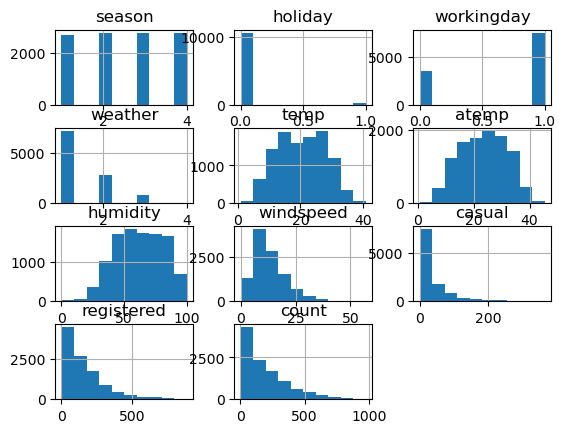

In [74]:
### YOUR CODE HERE ###
df.hist()
plt.title("Гистограмма распределения для каждой из метрик")
plt.show()

### 2.
Для каждой метрики найдите среднее, дисперсию, 50, 75 и 99 перцентили, моду. Какие выводы о наличии аномалий мы можем сделать?

In [76]:
### YOUR CODE HERE ###
df.describe([.5, .75, .99])

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
99%,4.000000,1.000000,1.000000,3.000000,36.08000,40.150000,100.000000,35.000800,240.150000,697.000000,774.150000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [23]:
df.mode()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,4,0,1,1,14.76,31.06,88,0.0,0,3,5


In [22]:
df.var()

season            1.245845
holiday           0.027755
workingday        0.217304
weather           0.401751
temp             60.708872
atemp            71.818856
humidity        370.371306
windspeed        66.659670
casual         2496.049219
registered    22812.789514
count         32813.313153
dtype: float64

### 3. (*) 
 Для каждой метрики проанализируйте ассиметрию и смещенность распределения – для этого посчитайте для каждой метрики коэффициент ассиметрии и эксцесса.

In [26]:
### YOUR CODE HERE ###
df.kurtosis()

season        -1.355661
holiday       30.046975
workingday    -1.397828
weather        0.395533
temp          -0.914530
atemp         -0.850076
humidity      -0.759818
windspeed      0.630133
casual         7.551629
registered     2.626081
count          1.300093
dtype: float64

In [25]:
df.skew()

season       -0.007076
holiday       5.660517
workingday   -0.776163
weather       1.243484
temp          0.003691
atemp        -0.102560
humidity     -0.086335
windspeed     0.588767
casual        2.495748
registered    1.524805
count         1.242066
dtype: float64

### 4.

Постройте симметричный доверительный интервал для метрики с самой большой дисперсией при доверительной вероятности 0.95. 

Text(0.5, 1.0, 'График распределения')

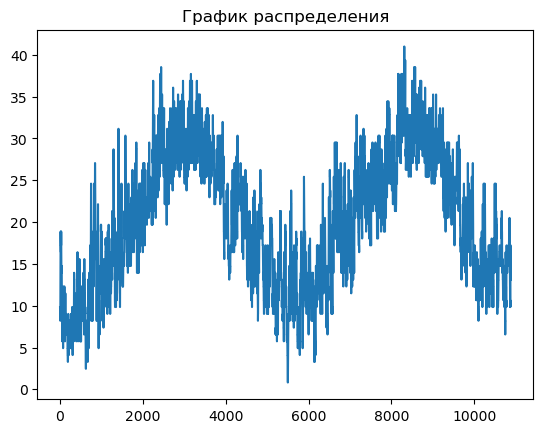

In [31]:
### YOUR CODE HERE - использую temp ###
df["temp"].plot()
plt.title("График распределения")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


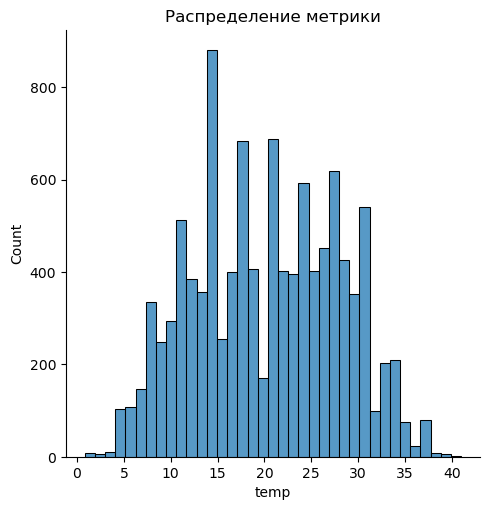

In [36]:
def my_basic_research (df, column):
    sns.displot(df[column])
    plt.title("Распределение метрики")
my_basic_research(df = df, column = "temp")

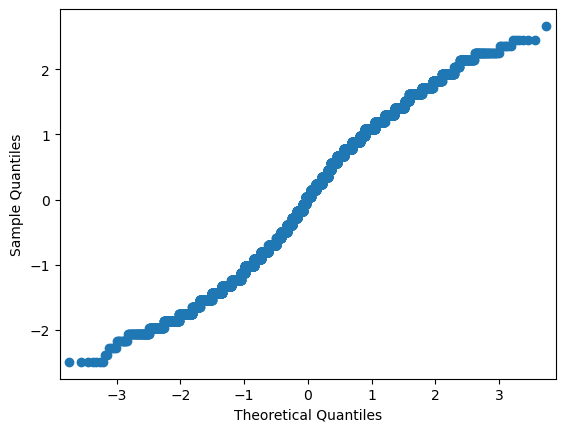

In [50]:
sm.qqplot(df.temp, fit = True)
plt.show()

In [48]:
def my_norm_confidence(df = df, column = "temp", alpha = 0.95):
    interval = stats.norm.interval(alpha, loc = df[column].mean(), scale = df[column].std())
    return interval
confidence = my_norm_confidence()
print(confidence)

(4.9596243434286595, 35.5020952964758)


Text(0.5, 1.0, 'Доверительный интервал')

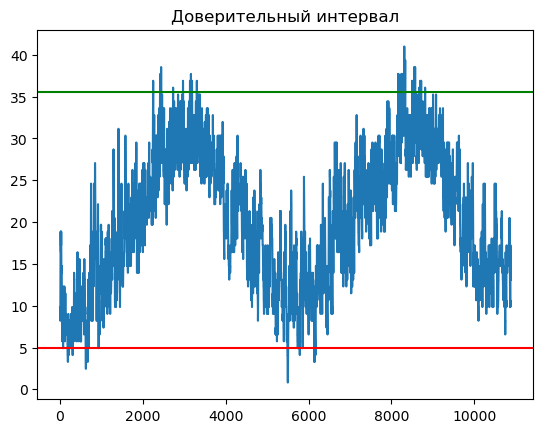

In [42]:
df["temp"].plot()
plt.axhline(y = confidence[1], color = "g", linestyle = "-")
plt.axhline(y = confidence[0], color = "r", linestyle = "-")
plt.title("Доверительный интервал")

### 5. (*)

Найдите количество значений, выходящих за три сигмы для каждой из метрик. Где получилось больше всего аномалий?

In [58]:
### YOUR CODE HERE ###
list_research = ["season", "holiday", "workingday", "weather", "temp", "atemp", "humidity", "windspeed", "casual", "registered", "count"]
def find_anomaly(df, column):
    upper_level = df[column].mean() + 3 * df[column].std()
    lower_level = df[column].mean() - 3 * df[column].std()
    return df[df[column] >= upper_level].count(), df[df[column] <= lower_level].count()
find_anomaly(df = df, column = list_research)

(season          0
 holiday       311
 workingday      0
 weather         1
 temp            0
 atemp           0
 humidity        0
 windspeed      67
 casual        292
 registered    235
 count         147
 dtype: int64,
 season         0
 holiday        0
 workingday     0
 weather        0
 temp           0
 atemp          0
 humidity      22
 windspeed      0
 casual         0
 registered     0
 count          0
 dtype: int64)

### 6.

Постройте корреляционную матрицу и heatmap по метрикам. Какие выводы о наличии связей можно сделать?

In [59]:
### YOUR CODE HERE ###
corr_m = df[list_research].corr()
corr_m

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


<Axes: >

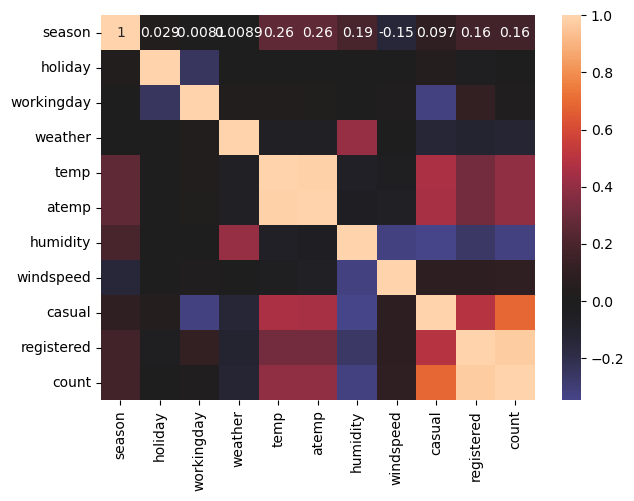

In [60]:
plt.figure(figsize = (7,5))
sns.heatmap(corr_m, center = 0, annot = True)

In [187]:
##Итоговое количество сданных в аренду велосипедов мало зависит от погоды в целом(чем выше температура, тем больше сданных велосипедов, 
##влажность негативно играет на количество арендованного оборудования, скорость ветра не оказывает существенного влияния), а также 
##оно не подвержено влиянию будних/ выходных дней.